In [21]:
from pymystem3 import Mystem
m = Mystem()

In [26]:
import gensim
import logging
import urllib.request
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import word2vec
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Пункт 1
1. Преобразовать текст в формат:
* только леммы, без знаков препинания, все в нижнем регистре
* каждое предложение на отдельной строчке

2. Обучить модель как показано в конспекте с параметрами
* размер вектора 300
* минимальное количество вхождений 5
* окно 5
* количество итераций 50
* Вопрос: сколько получилось слов в этой модели?

In [24]:
def read_clean(file, new_file):
    with open (file, encoding = 'utf-8') as f:
        my_text = f.readlines()
    for line in my_text:
        l = m.lemmatize(line)
        words = [w.lower() for w in l if w.isalpha()]
        line = ' '.join(words)
        with open (new_file, encoding = 'utf-8', mode = 'a') as n_f:
            n_f.write(line+'\n')
t = read_clean('anna-karenina.txt', 'lemmas_anna.txt')
t

In [27]:
f = 'lemmas_anna.txt'
data = gensim.models.word2vec.LineSentence(f)

In [28]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [29]:
%time model = gensim.models.Word2Vec(data, size=300, window=5, min_count=5, iter = 5)

2020-10-24 22:35:54,782 : INFO : collecting all words and their counts
2020-10-24 22:35:54,788 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-24 22:35:54,876 : INFO : collected 12335 word types from a corpus of 268921 raw words and 7825 sentences
2020-10-24 22:35:54,877 : INFO : Loading a fresh vocabulary
2020-10-24 22:35:54,885 : INFO : effective_min_count=5 retains 3997 unique words (32% of original 12335, drops 8338)
2020-10-24 22:35:54,886 : INFO : effective_min_count=5 leaves 254675 word corpus (94% of original 268921, drops 14246)
2020-10-24 22:35:54,900 : INFO : deleting the raw counts dictionary of 12335 items
2020-10-24 22:35:54,902 : INFO : sample=0.001 downsamples 56 most-common words
2020-10-24 22:35:54,903 : INFO : downsampling leaves estimated 184713 word corpus (72.5% of prior 254675)
2020-10-24 22:35:54,912 : INFO : estimated required memory for 3997 words and 300 dimensions: 11591300 bytes
2020-10-24 22:35:54,913 : INFO : resetting l

Wall time: 1.97 s


In [30]:
print(len(model.wv.vocab))

3997


3. Использовать следующие функции:
найти ближайшие 5 слов для
* любого частотного слова (союза/местоимения/частицы)
* абстрактного понятия
* имени главного героя
* прилагательных "хороший" и "плохой" (или любых других антонимов) (краткий комментарий про то, встретились ли синонимы, антонимы, близкие по распределению слова)

In [32]:
model.wv.most_similar("а", topn=5)

[('мы', 0.9927140474319458),
 ('ведь', 0.9884583353996277),
 ('ах', 0.9868578910827637),
 ('вот', 0.9851326942443848),
 ('подурнеть', 0.9850607514381409)]

In [33]:
model.wv.most_similar("мысль", topn=5)

[('душа', 0.9954140186309814),
 ('положение', 0.9905373454093933),
 ('сила', 0.9759438037872314),
 ('любовь', 0.9749729037284851),
 ('испытывать', 0.9716987013816833)]

In [34]:
model.wv.most_similar("левин", topn=5)

[('воркуев', 0.9859988689422607),
 ('князь', 0.97884202003479),
 ('чудак', 0.9783674478530884),
 ('княгиня', 0.976367712020874),
 ('задумчиво', 0.9715678095817566)]

In [35]:
model.wv.most_similar("константин", topn=5)

[('здоровый', 0.9988135099411011),
 ('батюшка', 0.9985101819038391),
 ('неохотно', 0.9984514117240906),
 ('послушать', 0.9983296990394592),
 ('побуждать', 0.9982552528381348)]

In [36]:
model.wv.most_similar("хороший", topn=5)

[('переделывать', 0.9950263500213623),
 ('должный', 0.992321789264679),
 ('нельзя', 0.9921967387199402),
 ('должно', 0.9919891357421875),
 ('убежденный', 0.9908873438835144)]

In [37]:
model.wv.most_similar("плохой", topn=5)

[('кончаться', 0.9992485046386719),
 ('обо', 0.999160647392273),
 ('согласный', 0.998979926109314),
 ('погибать', 0.9989731311798096),
 ('завидовать', 0.998711884021759)]

Никаких синонимов или антонимов не встретилось.

* найти любую семантическую пропорцию (краткий комментарий, почему Вы выбрали такую пропорцию)

Была выбрана пропорция из слов, значения которых легко сопоставить. Выяснилось, что для этих слов можель работает хорошо.

In [39]:
model.wv.most_similar(positive=["ты", "я"], negative=["мы"], topn=1)

[('вы', 0.9717498421669006)]

* найти лишнее в списке слов (краткий комментарий про результат)

Глагол *становиться* не относится к глаголам речи.

In [40]:
model.wv.doesnt_match('отвечать говорить спрашивать становиться понимать'.split())

'становиться'

Попробуйте сделать визуализацию с помощью PCA (один из вариантов на выбор, можно предложить свой)
* попробуйте на именах героев (4+ имен, можно брать имя и фамилию героя отдельно, это даже интересно): это отражает их отношения / их характеры?
* попробуйте на каких-то названиях предметов или животных: насколько это похоже на правду?
* попробуйте на союзах, частицах, экспрессивах, многозначных словах: насколько результат соответствует Вашим ожиданиям?

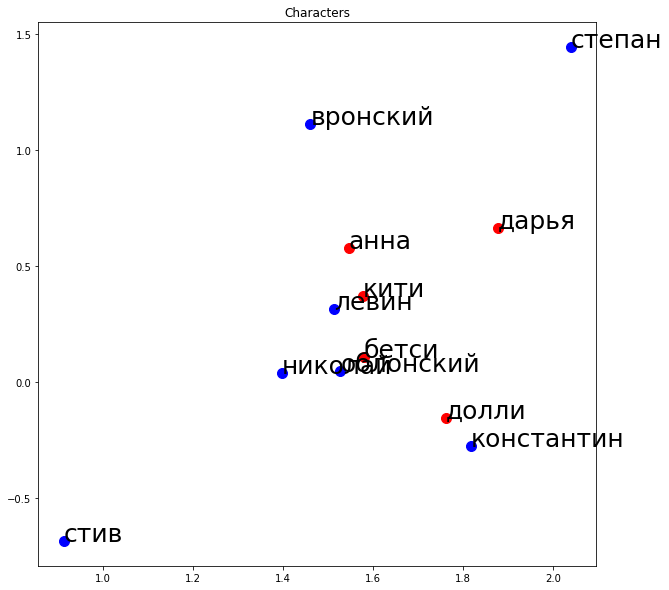

In [82]:
men = ['левин', 'константин', 'николай', 'стив', 'степан', 'облонский', 'вронский']
pca = PCA(n_components=2)
pca.fit(model[list(model.wv.vocab)])
coords = pca.transform(model[men])
plt.figure(figsize=(10, 10))
plt.scatter(coords[:, 0], coords[:, 1], s = 100, color='blue')
for i, word in enumerate(men):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]), size = 25)
women = ['кити', 'долли', 'дарья', 'бетси', 'анна']
coords = pca.transform(model[women])
plt.scatter(coords[:, 0], coords[:, 1], s = 100, color='red')
for i, word in enumerate(women):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]), size = 25)
plt.title('Characters')
plt.show()

* Можно заметить, что Анна и Кити довольно близки; кроме того, близки Лёвин и Кити. Это говорит о близости персонажей?
* Имена, фамилии и сокращённые имена употребляются по-разному.
* Мужчины и женщины не группируются в две группы, как я ожидала.

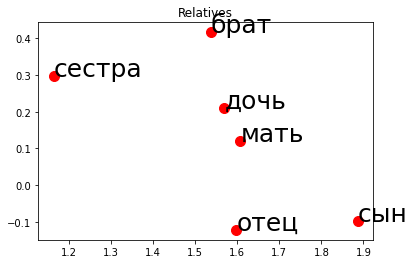

In [74]:
words = ['мать', 'отец', 'сын', 'дочь', 'брат', 'сестра']
pca = PCA(n_components=2)
pca.fit(model[list(model.wv.vocab)])
coords = pca.transform(model[words])
plt.scatter(coords[:, 0], coords[:, 1], s = 100, color='red')
plt.title('Relatives')
for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]), size = 25)
plt.show()

Вероятно, в романе наиболее подролбно описаны матери и дочери. По крайней мере, эти родственные связи наиболее часто упоминаются из-за семьи Щербацких.

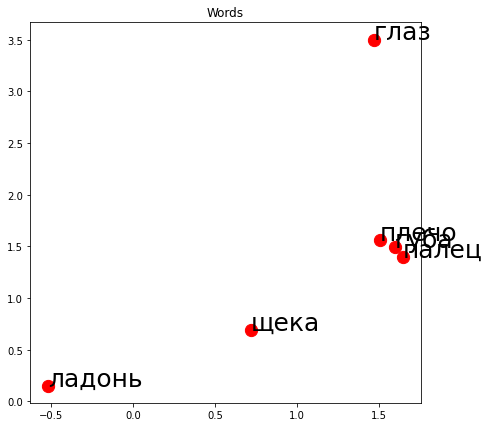

In [79]:
words = ['глаз', 'ладонь', 'губа', 'щека', 'палец', 'плечо']
pca = PCA(n_components=2)
pca.fit(model[list(model.wv.vocab)])
coords = pca.transform(model[words])
plt.figure(figsize=(7, 7))
plt.scatter(coords[:, 0], coords[:, 1], s = 150, color='red')
plt.title('Words')
for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]), size = 25)
plt.show()

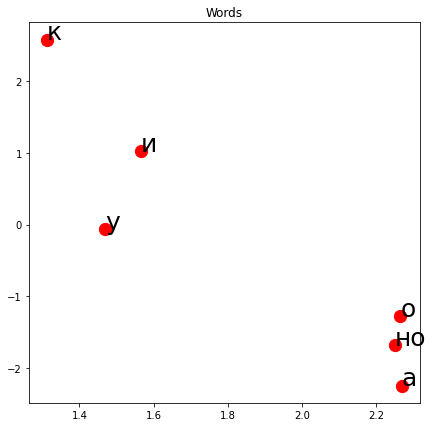

In [77]:
words = ['а', 'и', 'о', 'но', 'у', 'к']
pca = PCA(n_components=2)
pca.fit(model[list(model.wv.vocab)])
coords = pca.transform(model[words])
plt.figure(figsize=(7, 7))
plt.scatter(coords[:, 0], coords[:, 1], s = 150, color ='red')
plt.title('Words')
for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]), size = 25)
plt.show()

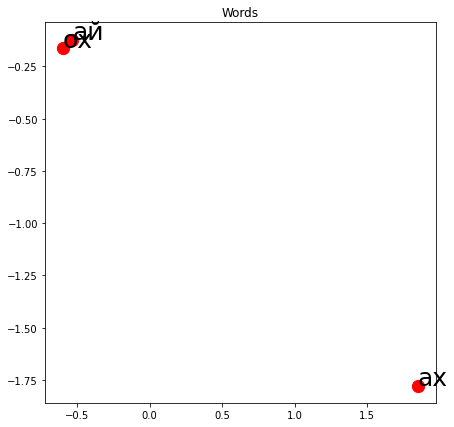

In [78]:
words = ['ах', 'ох', 'ай']
pca = PCA(n_components=2)
pca.fit(model[list(model.wv.vocab)])
coords = pca.transform(model[words])
plt.figure(figsize=(7, 7))
plt.scatter(coords[:, 0], coords[:, 1], s = 150, color ='red')
plt.title('Words')
for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]), size = 25)
plt.show()

*Ах* обозначает приятную эмоцию, а *ох* и*ух* -- неприятные.

In [50]:
def pre(sent):
    pre_sent = sent.lower().split()
    pre_sent = m.lemmatize(sent)
    my_sent = [w.lower() for w in pre_sent if w.isalpha()]
    return my_sent

s = 'Уж который раз он видел его приезжавшим в Москву из деревни, где он что-то делал, но что именно, того Степан Аркадьич никогда не мог понять хорошенько, да и не интересовался'
prep = pre(s)

In [51]:
def change (my_list, my_model, stops):
    new_sent = ''
    for word in my_list:
        if word not in stops:
            common = model.wv.most_similar(word, topn = 1)
            new_sent += common[0][0]
            new_sent += ' '
    print(new_sent)
my_stops = stopwords.words('russian')
change(prep, model, my_stops)

чувство но пожалуйста деревня общество сделать решать сергей борисовна потому знать поверять затем 
